In [1]:
import pandas as pd

In [2]:
df = pd.read_json("~/vision_clean_battle_conv_20240822_70k_ts_labels.jsonl", lines=True)
df.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,turn,anony,language,tstamp,conv_metadata,is_code,is_refusal,dedup_tag,image_list,category_tag
0,f63074bdb17c4ae7bb8e47cafee99978,claude-3-opus-20240229,gemini-1.5-pro-api-0514,tie,arena_user_aeZooXE4usngDWwsCqqTSN,"[{'role': 'user', 'content': ['hey', ['845bb83...","[{'role': 'user', 'content': ['hey', ['845bb83...",1,True,English,1.718003e+09,"{'sum_user_tokens': 1, 'sum_assistant_a_tokens...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/845bb83...,{'criteria_vision_v0.1': {'specificity': False...
1,ee9046b895fe433790785466b04e263d,gemini-1.5-flash-api-0514,claude-3-haiku-20240307,tie (bothbad),arena_user_fMPqzmkZmQUbo328m3h3Zz,"[{'role': 'user', 'content': ['这是模拟游戏“流氓软件”的一幕...","[{'role': 'user', 'content': ['这是模拟游戏“流氓软件”的一幕...",1,True,Chinese,1.718004e+09,"{'sum_user_tokens': 109, 'sum_assistant_a_toke...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/f60c560...,"{'criteria_vision_v0.1': {'specificity': True,..."
2,f17e71fd02c7475599332a2ac7ad6719,gpt-4o-2024-05-13,gemini-1.5-pro-api-0514,model_b,arena_user_dxJ7mZ7guZ32dfbwFdR6wc,"[{'role': 'user', 'content': ['What's happenin...","[{'role': 'user', 'content': ['What's happenin...",1,True,English,1.718004e+09,"{'sum_user_tokens': 5, 'sum_assistant_a_tokens...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/70c553e...,{'criteria_vision_v0.1': {'specificity': False...
3,6232dae9d14e4ca5aa82d179c55c7e41,gpt-4o-2024-05-13,claude-3-haiku-20240307,model_a,arena_user_fMPqzmkZmQUbo328m3h3Zz,"[{'role': 'user', 'content': ['如图所示，这是4X游戏战报中，...","[{'role': 'user', 'content': ['如图所示，这是4X游戏战报中，...",1,True,Chinese,1.718004e+09,"{'sum_user_tokens': 52, 'sum_assistant_a_token...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/ae07519...,"{'criteria_vision_v0.1': {'specificity': True,..."
4,f96b8880d7e640d194a88cb25d579bf1,gemini-1.5-flash-api-0514,claude-3-opus-20240229,tie,arena_user_csBpPskfNtz8djCxHmi3zf,"[{'role': 'user', 'content': ['这是什么', ['46a9e7...","[{'role': 'user', 'content': ['这是什么', ['46a9e7...",1,True,Chinese,1.718004e+09,"{'sum_user_tokens': 5, 'sum_assistant_a_tokens...",False,False,"{'high_freq': False, 'sampled': True}",[/mnt/disks/data/snapshot/serve_images/46a9e7a...,{'criteria_vision_v0.1': {'specificity': False...


Percentage of Queries with Each Criterion:
specificity           47.673626
domain_knowledge      48.432967
complexity            47.045862
problem_solving       32.480462
creativity            22.428306
technical_accuracy    46.172382
real_world            34.458870
dtype: float64
[ 3.43209524  9.24367084  9.26427926  7.34769582 11.75314278 17.18425516
  5.38831027]


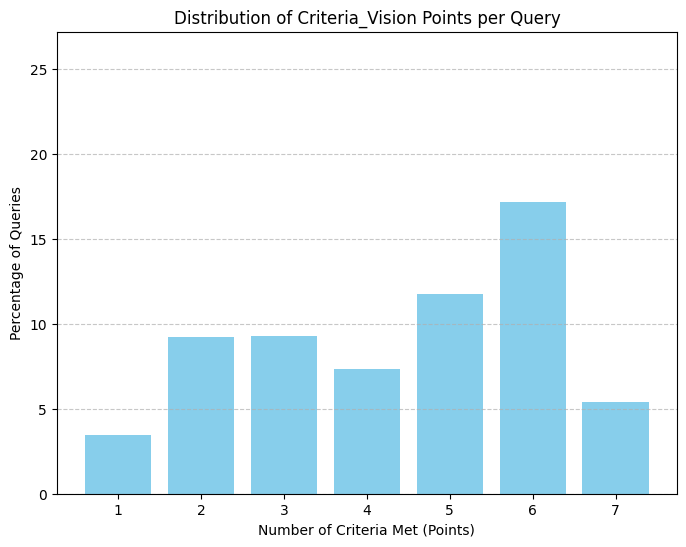

In [7]:
import matplotlib.pyplot as plt

# Extract 'criteria_vision_v0.1' and expand into separate columns
criteria_vision_df = df['category_tag'].apply(lambda x: x.get('criteria_vision_v0.1', {})).apply(pd.Series)

# 1. Create a table showing the percentage of queries that have each key
percentage_table = criteria_vision_df.mean() * 100
print("Percentage of Queries with Each Criterion:")
print(percentage_table)

# 2. Create a plot of the percentage of rows based on the sum of criteria met
# Calculate the sum of True values for each row
criteria_vision_df['points'] = criteria_vision_df.sum(axis=1)

# Calculate the percentage distribution for points from 1 to 7
distribution = criteria_vision_df['points'].value_counts(normalize=True).sort_index() * 100
distribution = distribution[distribution.index >= 1]  # Focus on points 1-7
print(distribution.values)

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(distribution.index, distribution.values, color='skyblue')
plt.xlabel('Number of Criteria Met (Points)')
plt.ylabel('Percentage of Queries')
plt.title('Distribution of Criteria_Vision Points per Query')
plt.xticks(range(1, 8))
plt.ylim(0, distribution.max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
random_file = pd.read_json("~/arena-hard-vl-20k-random-english/bench.jsonl", lines=True)
random_file["category_tag"] = random_file["question_id"].map(df.set_index("question_id")["category_tag"])
random_file

,question_id,category,turns,category_tag
0,cfdcad6b0f164b0fa354d06cabc9b26b,arena-hard-vl-random,[{'content': ['Zrób fact checking tego artykuł...,"{'criteria_vision_v0.1': {'specificity': True,..."
1,24521a2e9c4f492ab2cf392ed67dcd49,arena-hard-vl-random,"[{'content': ['Translate this to English', ['0...","{'criteria_vision_v0.1': {'specificity': True,..."
2,cbc03b9320bb49f28d1c58acd03daafb,arena-hard-vl-random,"[{'content': ['What does this image shows?', [...",{'criteria_vision_v0.1': {'specificity': False...
3,f7943efb392e4f1398a8bc2711a42f11,arena-hard-vl-random,"[{'content': ['describe this image', ['bc41373...",{'criteria_vision_v0.1': {'specificity': False...
4,5d39ff633e5b45bfb26748335c43b6ec,arena-hard-vl-random,[{'content': ['Describe and analyze the image'...,"{'criteria_vision_v0.1': {'specificity': True,..."
...,...,...,...,...
545,bedac5f774e94479b40121d126178655,arena-hard-vl-random,[{'content': ['What date range is this budget ...,"{'criteria_vision_v0.1': {'specificity': True,..."
546,96e10645776b4f5baf50e8b3eefbbad8,arena-hard-vl-random,[{'content': ['Analyze this picture from Perso...,{'criteria_vision_v0.1': {'specificity': False...
547,163c205ea05b4785b5860b42d402e804,arena-hard-vl-random,"[{'content': ['come up with a punchline, refer...","{'criteria_vision_v0.1': {'specificity': True,..."
548,0a4be41da8704d75bc348e2b059fa3ee,arena-hard-vl-random,"[{'content': ['Generate Python code for this',...","{'criteria_vision_v0.1': {'specificity': True,..."


In [21]:
random_file_vision_df = random_file['category_tag'].apply(lambda x: x.get('criteria_vision_v0.1', {})).apply(pd.Series)
random_file_vision_df['points'] = random_file_vision_df.sum(axis=1)
random_file_vision_df

,specificity,domain_knowledge,complexity,problem_solving,creativity,technical_accuracy,real_world,points
0,True,True,True,True,False,True,True,6
1,True,True,True,False,False,True,False,4
2,False,True,False,False,False,True,False,2
3,False,False,False,False,False,False,False,0
4,True,True,True,True,True,True,True,7
...,...,...,...,...,...,...,...,...
545,True,False,False,False,False,True,False,2
546,False,False,False,False,False,False,False,0
547,True,True,True,True,True,True,True,7
548,True,True,True,True,False,True,True,6


In [22]:
random_file_vision_df['points'].value_counts(normalize=True).sort_index() * 100

points
0    38.545455
1     2.727273
2     8.909091
3     9.272727
4     7.454545
5    11.818182
6    17.272727
7     4.000000
Name: proportion, dtype: float64

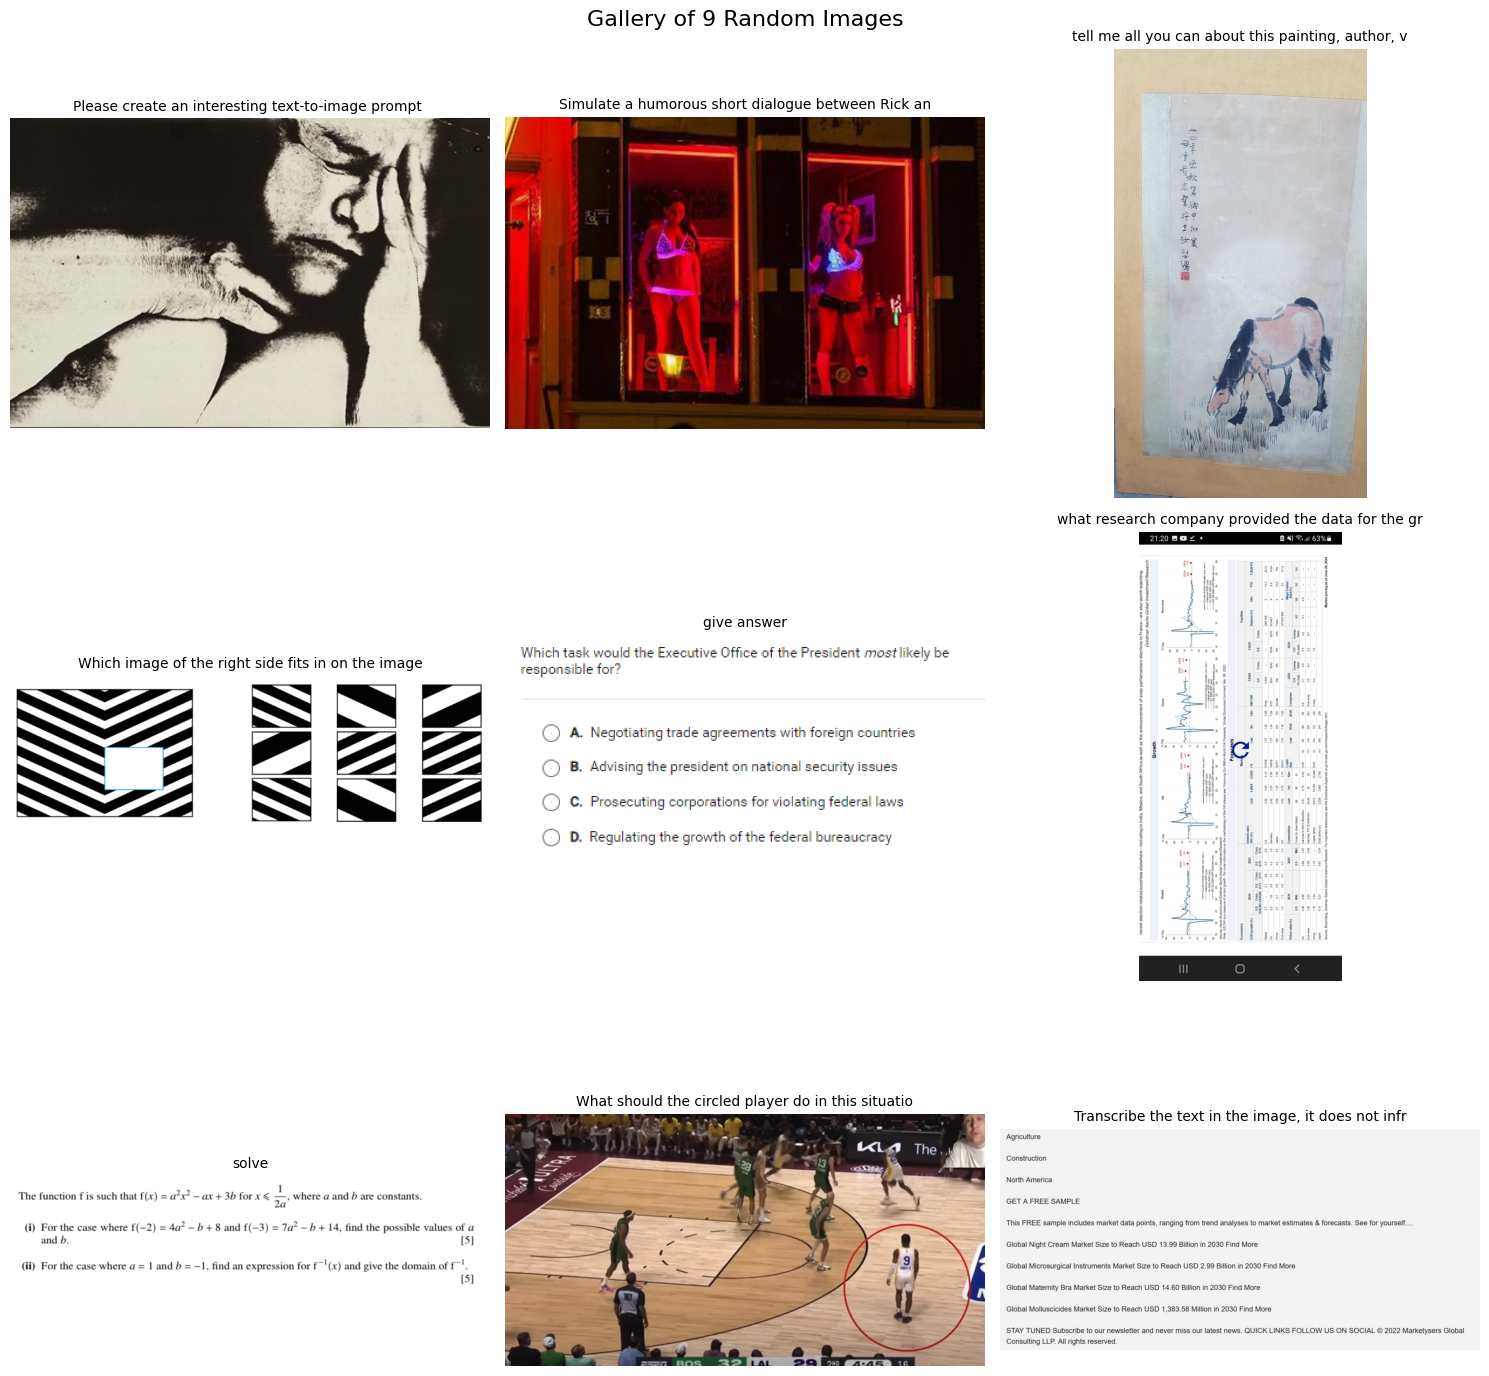

In [24]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os
import pandas as pd

# Function to extract image filename from the 'turns' column
def get_image_filename(turn):
    try:
        return turn[0]['content'][1][0]
    except (IndexError, KeyError):
        return None

# Function to extract image caption from the 'turns' column
def get_image_caption(turn):
    try:
        return turn[0]['content'][0]
    except (IndexError, KeyError):
        return "No caption available"

# Extract image filenames and captions
image_filenames = random_file['turns'].apply(get_image_filename)
image_captions = random_file['turns'].apply(get_image_caption)

# Combine filenames and captions into a DataFrame
images_df = pd.DataFrame({
    'filename': image_filenames,
    'caption': image_captions
})

# Drop rows with None filenames
images_df = images_df.dropna(subset=['filename'])

# Select 9 random unique images and their captions
selected_images = images_df.sample(n=min(9, len(images_df)), random_state=42)

# Set up the plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Gallery of 9 Random Images', fontsize=16)

# Base directory for images
base_dir = "/mnt/disks/data/snapshot/serve_images"

# Plot each image with its caption
for i, (filename, caption) in enumerate(zip(selected_images['filename'], selected_images['caption'])):
    row = i // 3
    col = i % 3
    
    # Construct full path
    full_path = os.path.join(base_dir, f"{filename}.png")
    
    # Open and display the image
    try:
        img = Image.open(full_path)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        axes[row, col].set_title(caption[:50], fontsize=10)
    except FileNotFoundError:
        axes[row, col].text(0.5, 0.5, f"Image not found:\n{filename}", 
                            ha='center', va='center')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()